# Import Libraries and Project Paths

In [1]:
import yaml
import torch

In [2]:
from utils.setup_path import add_project_root_to_path
add_project_root_to_path()

In [14]:
from CNN_FashionMNIST.models.cnn import CNNFashionMNIST
from CNN_FashionMNIST.utils.dataset import load_fashion_mnist
from CNN_FashionMNIST.utils.train_utils import train_model
from CNN_FashionMNIST.utils.visualization import evaluate_model, plot_losses, plot_confusion_matrix

# Load Configuration

In [4]:
with open('../configs/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [17]:
batch_size = config['batch_size']
learning_rate = config['learning_rate']
num_epochs = config['num_epochs']
device = torch.device(config['device'] if torch.cuda.is_available() else "cpu")
class_names = config['class_names']

In [18]:
print(f"Batch size: {batch_size}")
print(f"Learning rate: {learning_rate}")
print(f"Number of epochs: {num_epochs}")
print(f"Using device: {device}")
print(f"Classes: {class_names}")

Batch size: 1024
Learning rate: 0.001
Number of epochs: 10
Using device: cuda
Classes: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


# Get Data Loaders

In [7]:
train_loader, val_loader, test_loader = load_fashion_mnist(batch_size)

Training samples: 48000
Validation samples: 12000
Test samples: 10000


# Initialize model, optimizer, and loss function

In [8]:
model = CNNFashionMNIST()
print(model)

CNNFashionMNIST(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=147, out_features=147, bias=True)
  (fc2): Linear(in_features=147, out_features=10, bias=True)
)


In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model

In [13]:
history = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, device)

Epoch 1/10


100%|██████████| 47/47 [00:05<00:00,  8.81it/s]


Train Loss: 1.5514 | Val Loss: 0.9367
Epoch 2/10


100%|██████████| 47/47 [00:05<00:00,  8.39it/s]


Train Loss: 0.7610 | Val Loss: 0.6372
Epoch 3/10


100%|██████████| 47/47 [00:06<00:00,  7.05it/s]


Train Loss: 0.6013 | Val Loss: 0.5570
Epoch 4/10


100%|██████████| 47/47 [00:06<00:00,  7.47it/s]


Train Loss: 0.5374 | Val Loss: 0.5101
Epoch 5/10


100%|██████████| 47/47 [00:06<00:00,  7.44it/s]


Train Loss: 0.4953 | Val Loss: 0.4784
Epoch 6/10


100%|██████████| 47/47 [00:06<00:00,  7.39it/s]


Train Loss: 0.4640 | Val Loss: 0.4508
Epoch 7/10


100%|██████████| 47/47 [00:06<00:00,  7.43it/s]


Train Loss: 0.4389 | Val Loss: 0.4283
Epoch 8/10


100%|██████████| 47/47 [00:06<00:00,  7.47it/s]


Train Loss: 0.4185 | Val Loss: 0.4124
Epoch 9/10


100%|██████████| 47/47 [00:06<00:00,  7.63it/s]


Train Loss: 0.4003 | Val Loss: 0.4017
Epoch 10/10


100%|██████████| 47/47 [00:06<00:00,  7.19it/s]


Train Loss: 0.3860 | Val Loss: 0.3870


# Evaluate the Model and Visualize Results

In [20]:
# Evaluate the model on the test dataset
cm, report = evaluate_model(model, test_loader, device)

# Display classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.81      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.80      0.74      0.77      1000
       Dress       0.84      0.89      0.86      1000
        Coat       0.72      0.80      0.76      1000
      Sandal       0.95      0.94      0.95      1000
       Shirt       0.64      0.61      0.62      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.96      0.94      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Plot confusion matrix

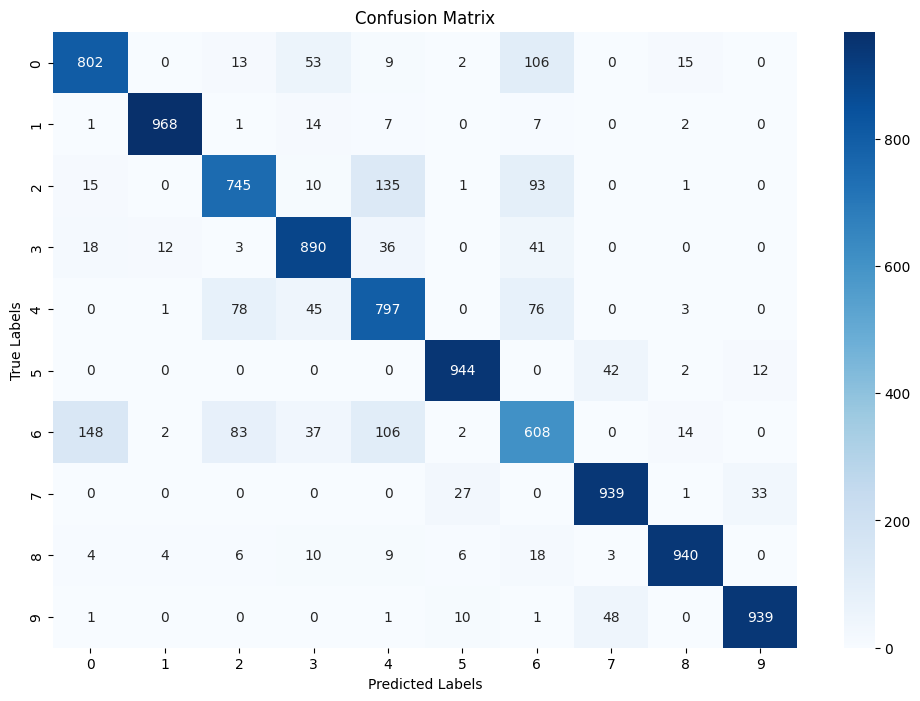

In [21]:
plot_confusion_matrix(cm, class_names)

## Visualize training and validation losses

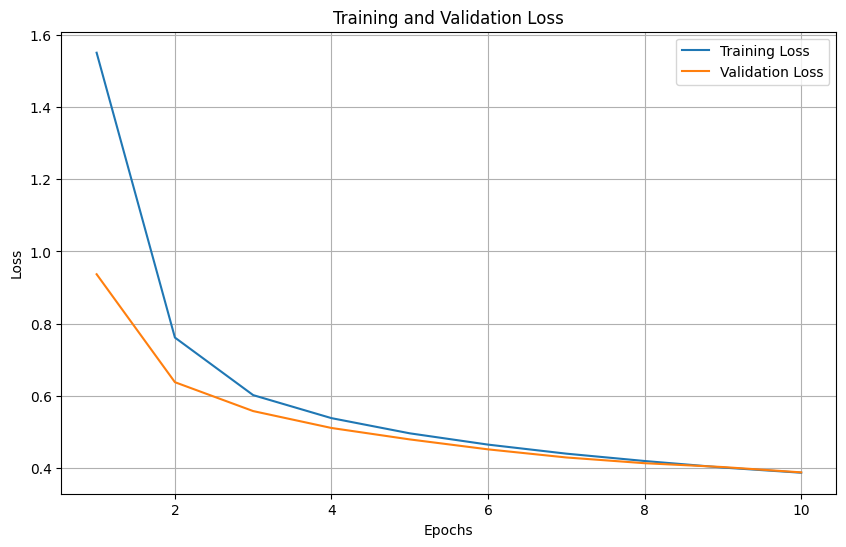

In [22]:
plot_losses(history)

# Save the trained model

In [24]:
model_save_path = "../models/cnn_fashion_mnist.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at ../models/cnn_fashion_mnist.pth
